#Regresión logistica

#Introducción
En el siguiente ejercicio se va a realizar un regresión logistica utilizando los datos del data set utilizado son de un banco. Se utiliza la columa default y la columna loan para trabajar con el modelo, la regresión logistica trabaja con datos binarios o de true o false, por lo cual datos numericos como 1.2, 2.2, etc. No sirven para trabajar con el modelo o para las predicciones.

Utilizando las variables edad, cuanto gana.

Como generar una regresión logistica con pandas

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


Utilizando una extensión de VISUAL STUDIO CODE para editar CSV edite el archivo para que en vez de yes o no en las columnas fueran 0 y 1 ya que si no fuera de esa manera se tendria que realizar una conversión utilizando .map para que leyera los valores ya que si no se hace esta converión el modelo arroja un error de que no se puede trabajar con valores de tipo String.

In [34]:
from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/mineria/newData.csv"
data = pd.read_csv(ruta, encoding="latin1")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


X = data[["loan"]] es la variable predictoria o variable independiente la cual nos va a servir para predecir los valores a futuros.

Y = data["default"] es la variable dependiente es decir depende del valor de X para predecir el modelo.

In [35]:
X = data[['loan']]
y = data['default']

Utilizando la libreria train_test_split que es parte de Scikit-learn lo que hace es que trabaja con las variables X y Y para comenzar a entrenar el modelo, el modelo se divie en 4 variables X_train, X_test, y_train, y_test, las cuales nos van a servir para el entrenamiento y las pruebas del modelo.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Se crea el modelo el cual utilizara una regresión logistica para trabajar.

In [37]:
model = LogisticRegression()


Se comienza con el entrenamiento del modelo

In [38]:
model.fit(X_train, y_train)

LogisticRegression()

Y se comienza a predecir los valores del modelo.

In [39]:
y_pred = model.predict(X_test)


In [43]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8874
           1       0.00      0.00      0.00       164

    accuracy                           0.98      9038
   macro avg       0.49      0.50      0.50      9038
weighted avg       0.96      0.98      0.97      9038



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Conclusión y Explicación de la grafica.
¿Porqué la pendiente dio una linea?
Es algo raro pero segun el libro The Elements of Statistical Learning
Data Mining, Inference, and Prediction de Trevor Hastie
Robert Tibshirani
Jerome Friedman, menciona que la regresión logistica no se llega a curvar debido a que la variable independiente solo se esta trabajando con una y la relación entre la variable puede ser lineal.
Si la relación entre la variable independiente y la probabilidad de pertenecer a la clase positiva es lineal, entonces se puede representar visualmente como una línea recta.

Nota: en la mayoria de casos se trabaja con más de una variable independiente por lo cual es cuando la regresión logistica comienza a curva la lineal.

Link del libro: https://hastie.su.domains/Papers/ESLII.pdf

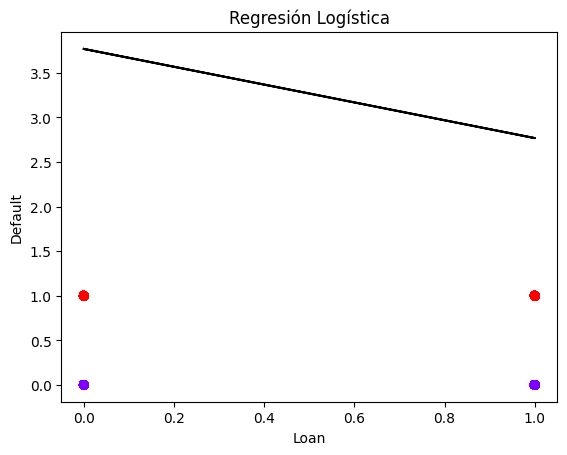

In [42]:
plt.scatter(X['loan'], y, c=y, cmap='rainbow')  # Grafica los puntos de datos con colores según la etiqueta
plt.plot(X['loan'], -(model.coef_[0] * X['loan'] + model.intercept_) / model.coef_[0], color='black')  # Grafica la línea de separación
plt.xlabel('Loan')
plt.ylabel('Default')
plt.title('Regresión Logística')
plt.show()